In [2]:
%load_ext autoreload
%autoreload 2
import dotenv
dotenv.load_dotenv()

True

In [66]:
from mlworkflow import PickledDataset
ds = PickledDataset(find("camera_with_ball_visible_views.pickle"))
print("dataset contains ", len(ds.keys.all()), " images of balls.")

camera_with_ball_visible_views.pickle found in /home/gva/repositories/deepsport/basketball-instants-dataset/camera_with_ball_visible_views.pickle
dataset contains  364  images of balls.


# Load trainer

In [76]:
from experimentator import build_experiment, find

exp = build_experiment(find("../configs/ballseg.py"), load_weights=False, eval_epochs=range(0,101,10))

../configs/ballseg.py found in /import/home/gva/repositories/deepsport/notebooks/../configs/ballseg.py
gva/camera_with_ball_visible_views.pickle found in /DATA/datasets/gva/camera_with_ball_visible_views.pickle


# Show dataset
- on the left: input image
- in the middle: difference between the input image and the next image (captured by a still camera)
- on the right: annotated ball circle

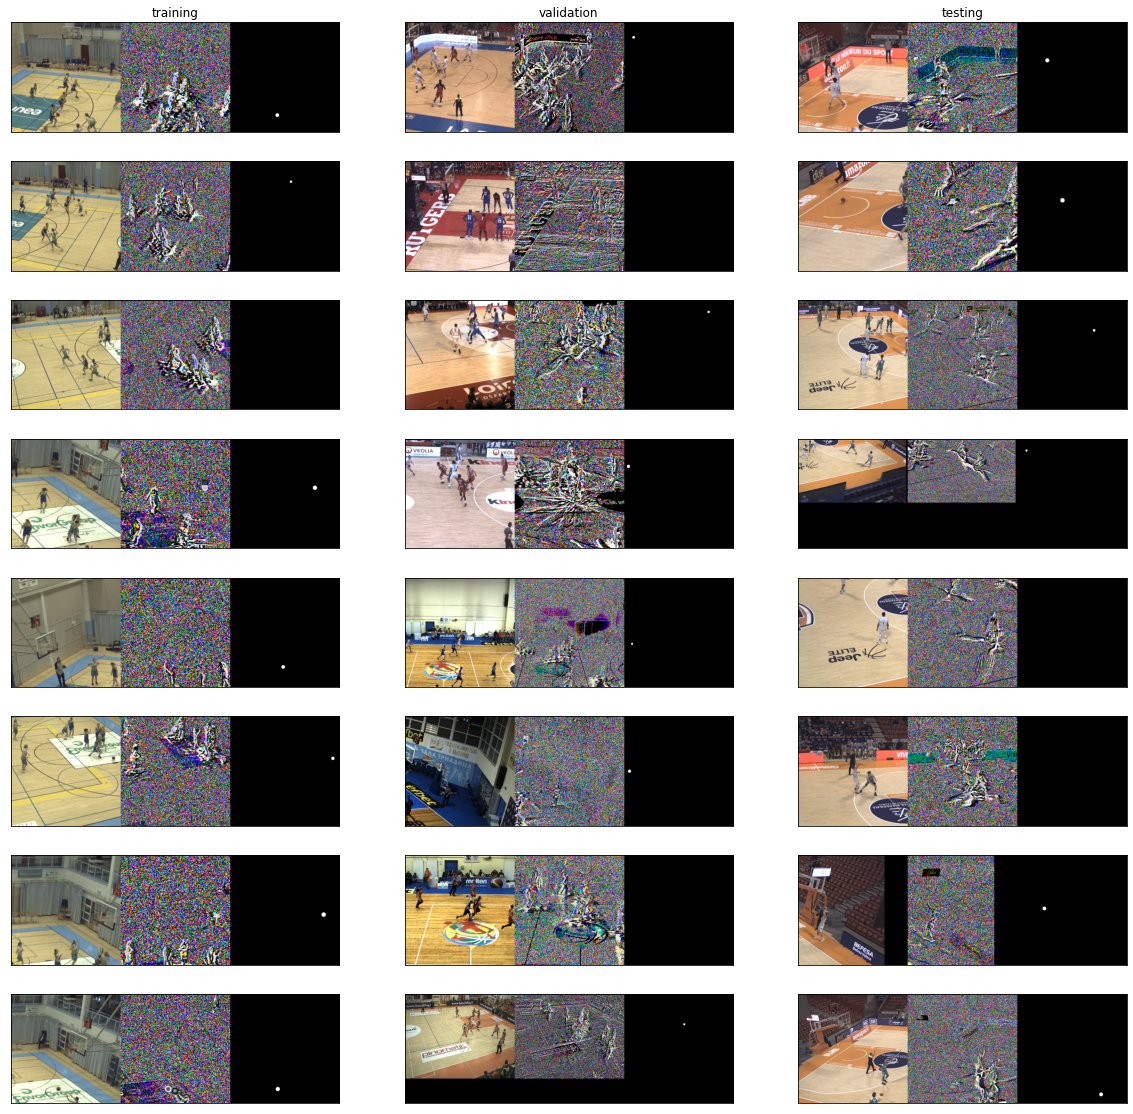

In [74]:
from matplotlib import pyplot as plt
from deepsport_utilities.utils import colorify_heatmap, np

N = 8
fig, axes = plt.subplots(N, len(exp.subsets), figsize=(20,20))
for j, subset in enumerate(exp.subsets):
    it = iter(subset.keys)
    for i in range(N):
        item = subset.dataset.query_item(next(it))
        target_rgb = colorify_heatmap(item['target']*255, colormap='gray')
        axes[i,j].imshow(np.hstack([item["input_image"], item["input_image"]-item['input_image2'], target_rgb]))
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
    axes[0,j].set_title(subset.name)

# Train for 10 epochs

In [ ]:
exp.train(10) # Good performence obtained after 100 epochs

# Show inference result

# Print resulting metrics